In [1]:
import os

os.sys.path.insert(0, '../script')

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from webnlg import WebNLGCorpus, DATASETS_FILEPATHS
%matplotlib inline

pd.set_option('max_colwidth', 1000)

import seaborn as sns

In [5]:
# datasets
DATASETS_FILEPATHS.keys()

dict_keys(['dev', 'train', 'test_no_lex', 'test_unseen_with_lex', 'test_with_lex'])

# Dataset Stats

In [6]:
# loads datasets

train = WebNLGCorpus.load(dataset='train')
dev = WebNLGCorpus.load(dataset='dev')
test_no_lex = WebNLGCorpus.load(dataset='test_no_lex')
test_unseen_with_lex = WebNLGCorpus.load(dataset='test_unseen_with_lex')
test_with_lex = WebNLGCorpus.load(dataset='test_with_lex')

datasets = [train, dev, test_no_lex, test_unseen_with_lex, test_with_lex]

In [8]:
# generate some statistics

datasets_stats = pd.DataFrame({
    # number of entries
    'n_entries': [len(ds) for ds in datasets],
    # number of distinct triples
    'n_distinct_triples': [ds.mdf.mtext.nunique() for ds in datasets],
    # number of distinct generated texts - if test_no_lex, returns 0
    'n_distinct_lexes': [ds.ldf.ltext.nunique() if ds.dataset != 'test_no_lex' else 0 for ds in datasets],
    # number of triples -> each entry can have up to 7 triples
    'n_triples': [len(ds.mdf) for ds in datasets]
    }, index=[ds.dataset for ds in datasets])

datasets_stats

,n_distinct_lexes,n_distinct_triples,n_entries,n_triples
train,18051,2090,6940,20458
dev,2266,1102,872,2563
test_no_lex,0,2331,1862,5378
test_unseen_with_lex,2430,1068,891,2450
test_with_lex,4922,2331,1862,5378


## Is there any duplicated lexicalized text?

In [9]:
train.ldf.ltext.value_counts().nlargest(5)

St Vincent-St Mary High School, Akron, Summit County, Ohio, United States is the ground of Akron Summit Assault.    3
Barack Obama is the leader of the United States.                                                                    3
Joe Biden is a leader of the United States.                                                                         3
Binignit is a dessert from the region of Visayas, Philippines. Taro and banana are prominent ingredients.           2
Texas is located in the United States.                                                                              2
Name: ltext, dtype: int64

In [18]:
barack_obama_idx = train.ldf[train.ldf.ltext == 'Barack Obama is the leader of the United States.'].idx

train.edf[train.edf.idx.isin(barack_obama_idx)]

,category,content,eid,idx,ntriples,size
873,Building,"b'<entry category=""Building"" eid=""Id232"" size=""1"">\n <originaltripleset>\n <otriple>United_States | leader | Barack_Obama</otriple>\n </originaltripleset>\n <originaltripleset>\n <otriple>United_States | leaderName | Barack_Obama</otriple>\n </originaltripleset>\n <modifiedtripleset>\n <mtriple>United_States | leaderName | Barack_Obama</mtriple>\n </modifiedtripleset>\n <lex comment=""good"" lid=""Id1"">The leader of the United States was Barack Obama.</lex>\n <lex comment=""good"" lid=""Id2"">Barack Obama is the leader of the U.S.</lex>\n <lex comment=""good"" lid=""Id3"">Barack Obama is the leader of the United States.</lex>\n </entry>\n '",Id232,3_231,1,1
1088,WrittenWork,"b'<entry category=""WrittenWork"" eid=""Id211"" size=""1"">\n <originaltripleset>\n <otriple>United_States | leaderName | Barack_Obama</otriple>\n </originaltripleset>\n <originaltripleset>\n <otriple>United_States | leader | Barack_Obama</otriple>\n </originaltripleset>\n <modifiedtripleset>\n <mtriple>United_States | leaderName | Barack_Obama</mtriple>\n </modifiedtripleset>\n <lex comment=""good"" lid=""Id1"">The leader of the United States is Barack Obama.</lex>\n <lex comment=""good"" lid=""Id2"">Barack Obama is the leader of the United States.</lex>\n <lex comment=""good"" lid=""Id3"">Barack Obama is the president of the US.</lex>\n </entry>\n '",Id211,4_210,1,1
1363,Food,"b'<entry category=""Food"" eid=""Id267"" size=""1"">\n <originaltripleset>\n <otriple>United_States | leader | Barack_Obama</otriple>\n </originaltripleset>\n <modifiedtripleset>\n <mtriple>United_States | leaderName | Barack_Obama</mtriple>\n </modifiedtripleset>\n <lex comment=""good"" lid=""Id1"">Barack Obama is a leader of the United States.</lex>\n <lex comment=""good"" lid=""Id2"">Barack Obama is the leader of the United States.</lex>\n <lex comment=""good"" lid=""Id3"">Barack Obama is the leader of United States.</lex>\n </entry>\n '",Id267,5_266,1,1


Is Barack Obama a Food? I've sent an e-mail to Anastasia Shimorina.

## Distribution per category and number of triples

In [19]:
def heatmap_by_category_ntriples(ds):
    
    # makes a figure
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    # heatmap of counts per category x ntriples
    sns.heatmap(pd.crosstab(ds.category, ds.ntriples), 
                # annotate counts
                annot=True,
                ax=ax,
                # integer formatting
                fmt='d',
                cmap='Blues')

### train

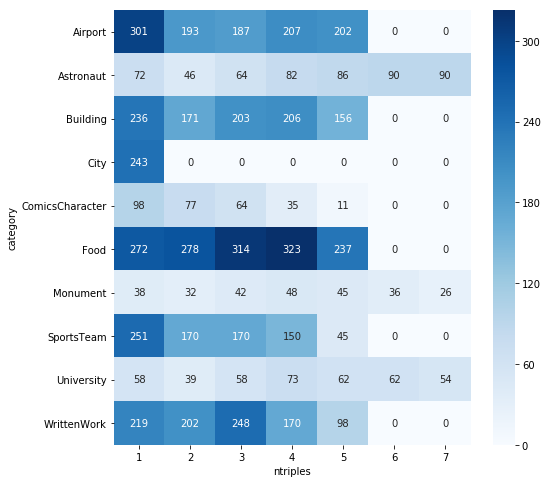

In [20]:
heatmap_by_category_ntriples(train.edf)

### dev

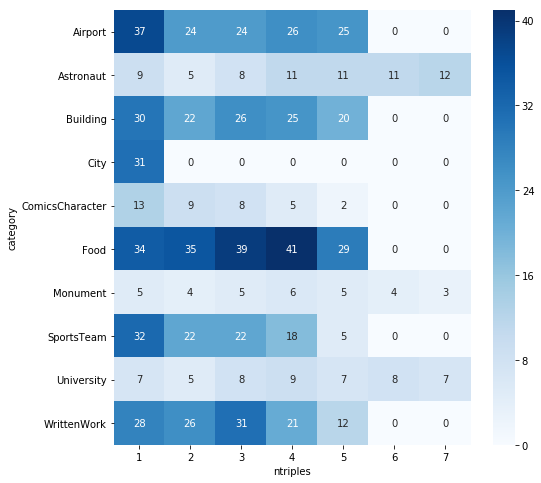

In [21]:
heatmap_by_category_ntriples(dev.edf)

### test_no_lex

there are categories on test that there aren't on train, like Artist

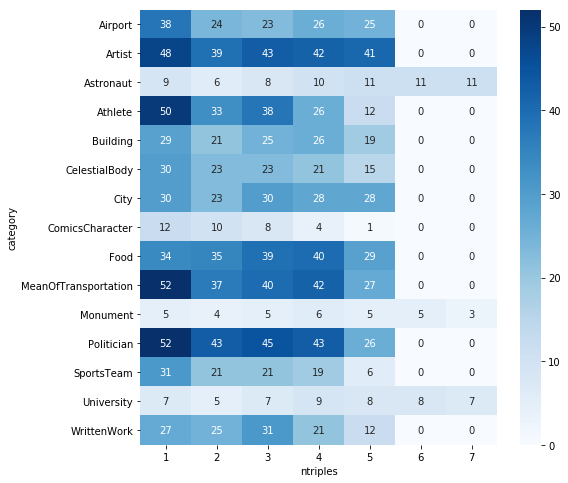

In [22]:
heatmap_by_category_ntriples(test_no_lex.edf)

### test_unseen_with_lex

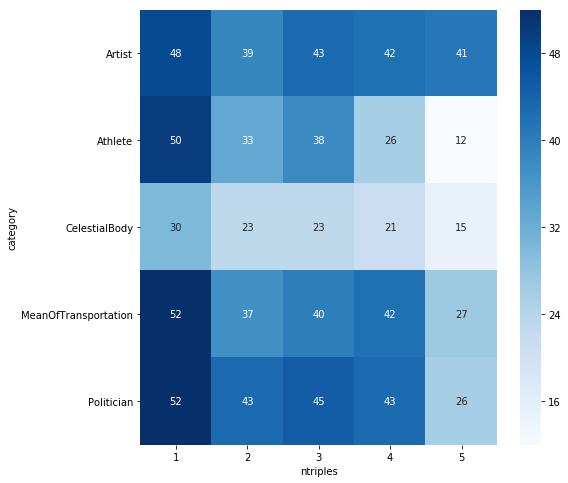

In [23]:
heatmap_by_category_ntriples(test_unseen_with_lex.edf)

# Have a look at a sample

In [24]:
train.sample(category='Astronaut', ntriples=1, random_state=100).mdf.mtext

1675    United_States | leader | Joe_Biden
Name: mtext, dtype: object

In [25]:
dev.sample(category='Astronaut', ntriples=1, random_state=100).mdf.mtext

42    Alan_Shepard | deathPlace | California
Name: mtext, dtype: object

In [26]:
test_no_lex.sample(category='Astronaut', ntriples=1, random_state=100).mdf.mtext

138    Apollo_8 | backup pilot | Buzz_Aldrin
Name: mtext, dtype: object

In [27]:
test_unseen_with_lex.sample(ntriples=1, random_state=100).mdf.mtext

177    Alison_O'Donnell | genre | Jazz
Name: mtext, dtype: object

# Is there any duplicates?

## Is there any modified triple duplicated in a tripleset?

No

In [35]:
# count how many entries has duplicated mtriples among its mtriples
def n_duplicated_mtriples_per_entry(ds):
    
    mtriples_count_per_entry = ds.mdf.groupby(['idx', 'mtext']).size()
    
    return (mtriples_count_per_entry > 1).sum()

In [38]:
pd.Series({dataset.dataset: n_duplicated_mtriples_per_entry(dataset)
             for dataset in datasets},
          name='number of cases of triples duplicated in a tripleset')

dev                     0
test_no_lex             0
test_unseen_with_lex    0
test_with_lex           0
train                   0
Name: number of cases of triples duplicated in a tripleset, dtype: int64

## Is there any modified triple duplicated among all entries?

yes

In [59]:
# counts, for each mtriple, in how many entries it occurs
def mtriples_count(ds):
    
    return ds.mdf.mtext.value_counts()

def mtriples_count_describe(ds):
    
    s = mtriples_count(ds).describe()
    s.name = ds.dataset
    
    return s

In [57]:
# ex: em média, cada triple no dataset train está repetida 9.7 vezes
#     no máximo, 111 vezes
pd.concat([mtriples_count_describe(ds) for ds in datasets], axis=1)

,train,dev,test_no_lex,test_unseen_with_lex,test_with_lex
count,2090.000000,1102.000000,2331.000000,1068.000000,2331.000000
mean,9.788517,2.325771,2.307164,2.294007,2.307164
std,11.838439,2.014941,2.216992,1.641108,2.216992
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000
50%,6.000000,2.000000,2.000000,2.000000,2.000000
75%,12.000000,3.000000,3.000000,3.000000,3.000000
max,111.000000,15.000000,39.000000,10.000000,39.000000


In [61]:
# most frequent triples in train dataset

cm_train = mtriples_count(train)

cm_train.head(3)

English_language | spokenIn | Great_Britain    111
United_States | capital | Washington,_D.C.      98
United_States | leaderName | Barack_Obama       88
Name: mtext, dtype: int64

## Are entries with shared triples lexicalized the same way?

Remember that the same triple can appear in entries with different size of tripleset.

There are some patterns...

In [75]:
def mtriples_with_generated_lexes(ds):
    
    # merges modified triple dataset and lexicalization dataset
    df = pd.merge(ds.mdf, ds.ldf)
    
    # groups by triple and for each triple generates a list of lexicalizations
    ddf = df.groupby('mtext').ltext.apply(list).to_frame()
    # adds a column with the number of lexicalizations
    ddf['size'] = ddf.ltext.apply(len)
    
    return ddf

# prints triple and its lexicalizations
def print_mtriple_with_generated_lexes(mtriple):
    
    print("triple: ", mtriple.index.values[0], '\n')
    for ltext in mtriple.ltext.tolist()[0]:
        print("lexicalization: ", ltext, '\n')

### train

For example: 

* *11_Diagonal_Street | floorArea | 1200 (square metres)* appears in entries with eids 3_14(size = 1) and 29_14(size = 4)

In [76]:
mtriples_w_lexes_train = mtriples_with_generated_lexes(train)

mtriples_w_lexes_train_size_lt_5 = mtriples_w_lexes_train[mtriples_w_lexes_train['size'] < 5]

print_mtriple_with_generated_lexes(mtriples_w_lexes_train_size_lt_5.head(1))

triple:  11_Diagonal_Street | floorArea | 1200 (square metres) 

lexicalization:  11 Diagonal Street has a floor area of 1200 square metres. 

lexicalization:  The architect of 11 Diagonal Street is Helmut Jahn and it was completed in 1983. It has 20 floors and a floor area of 1200 square metres. 

lexicalization:  11 Diagonal Street was designed by Helmut Jahn and was completed in 1983. It has 20 floors and an area of 1200 square metres. 

lexicalization:  Helmut Jahn was the architect of 11 Diagonal Street which was completed in 1983 with 20 floors and a total floor area of 1200 square metres. 



### dev

In [77]:
mtriples_w_lexes_dev = mtriples_with_generated_lexes(dev)

mtriples_w_lexes_dev_size_lt_5 = mtriples_w_lexes_dev[mtriples_w_lexes_dev['size'] < 5]

print_mtriple_with_generated_lexes(mtriples_w_lexes_dev_size_lt_5.head(1))

triple:  1._FC_Köln | manager | Peter_Stöger 

lexicalization:  Peter Stoger is the manager of FC Kolin. 

lexicalization:  Peter Stöger is manager of 1. FC Köln. 

lexicalization:  The manager of 1. FC Koln is Peter Stoger. 



### test_with_lex

no, you mustn't see the test data

## Number of distinct subjects, predicates, objects

### for each dataset

In [80]:
def report_n_distinct_s_p_o(mdf):
    
    return {'subject': mdf.m_subject.nunique(),
            'predicate': mdf.m_predicate.nunique(),
            'object': mdf.m_object.nunique(),
            # defined as a subject ou object
            'subject_and_object': pd.concat([mdf.m_subject, mdf.m_object]).nunique(),
            # vocabulary size
            'vocabulary': pd.concat([mdf.m_subject, mdf.m_object, mdf.m_predicate]).nunique()
           }

In [83]:
df = pd.DataFrame(data = [report_n_distinct_s_p_o(ds.mdf) for ds in datasets],
             index = [ds.dataset for ds in datasets])

df['unique_triples'] = [ds.mdf.mtext.nunique() for ds in datasets]
df

,object,predicate,subject,subject_and_object,vocabulary,unique_triples
train,1619,246,430,1755,2001,2090
dev,918,186,304,1059,1245,1102
test_no_lex,1888,300,575,2125,2425,2331
test_unseen_with_lex,898,159,238,1002,1161,1068
test_with_lex,1888,300,575,2125,2425,2331


### among all datasets

In [84]:
pd.DataFrame(report_n_distinct_s_p_o(pd.concat([ds.mdf for ds in datasets])),
             index=['all'])

,object,predicate,subject,subject_and_object,vocabulary
all,2505,354,667,2730,3084


## Most frequent subjects, predicates, objects

In [39]:
def most_frequent(ds, type_, n=5):
    
    if type_ == 'subject':
        return ds.mdf.m_subject.value_counts().nlargest(n)
    if type_ == 'object':
        return ds.mdf.m_object.value_counts().nlargest(n)
    if type_ == 'predicate':
        return ds.mdf.m_predicate.value_counts().nlargest(n)

### train

In [40]:
most_frequent(train, 'subject')

United_States                      692
Acharya_Institute_of_Technology    452
Elliot_See                         416
Alan_Shepard                       399
Alan_Bean                          385
Name: m_subject, dtype: int64

In [41]:
most_frequent(train, 'object')

United_States       858
English_language    264
Indonesia           166
Spain               150
Washington,_D.C.    122
Name: m_object, dtype: int64

In [42]:
most_frequent(train, 'predicate')

country       2150
location      1363
leaderName    1227
ingredient     652
isPartOf       573
Name: m_predicate, dtype: int64

### dev

In [43]:
most_frequent(dev, 'subject')

Acharya_Institute_of_Technology    87
Alan_Shepard                       79
United_States                      68
Elliot_See                         58
Buzz_Aldrin                        53
Name: m_subject, dtype: int64

In [44]:
most_frequent(dev, 'object')

United_States       86
English_language    30
Italy               20
India               20
Indonesia           19
Name: m_object, dtype: int64

In [45]:
most_frequent(dev, 'predicate')

country       259
location      174
leaderName    158
ingredient     86
region         80
Name: m_predicate, dtype: int64

# Is tripleset connected?

is there a path between any pair of triples?

## Let's check a sample

### non connected example

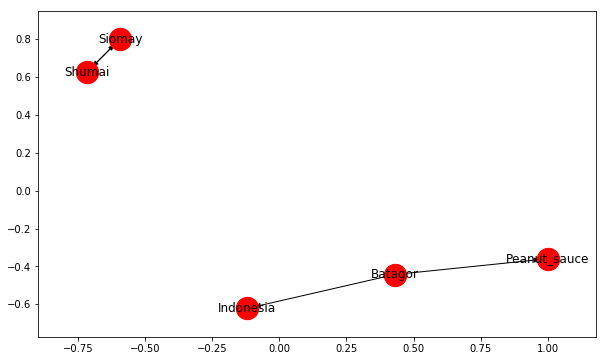

In [85]:
train.sample(idx='25_185').draw_graph()

### connected example

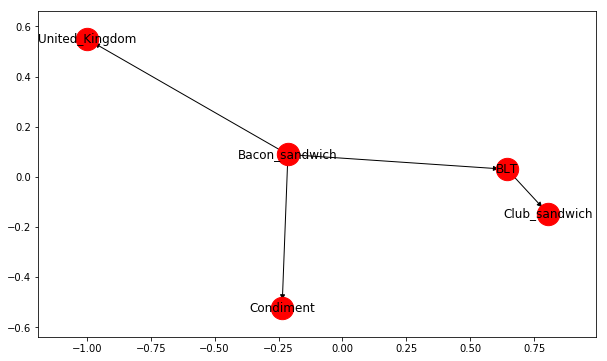

In [86]:
train.sample(idx='25_100').draw_graph()

## Let's check all tripleset

In [87]:
def entries_is_connected_df(mdf):

    is_connected = []

    for idx, entry_group in mdf.groupby('idx'):

        entry_group.reset_index(inplace=True)

        d_g = nx.from_pandas_edgelist(entry_group, 'm_subject', 'm_object', 'm_predicate', create_using=nx.DiGraph())
        u_g = nx.Graph(d_g)

        is_connected.append([idx, nx.is_connected(u_g)])

    is_connected_df = pd.DataFrame(is_connected, columns=['idx', 'is_connected'])
    
    return is_connected_df.is_connected.value_counts()

### train

In [88]:
entries_is_connected_df(train.mdf)

True     6930
False      10
Name: is_connected, dtype: int64

### dev

In [89]:
entries_is_connected_df(dev.mdf)

True     870
False      2
Name: is_connected, dtype: int64

### test_unseen_with_lex

In [90]:
entries_is_connected_df(test_unseen_with_lex.mdf)

True     887
False      4
Name: is_connected, dtype: int64

# Is it possible to determine a 'root' entity?

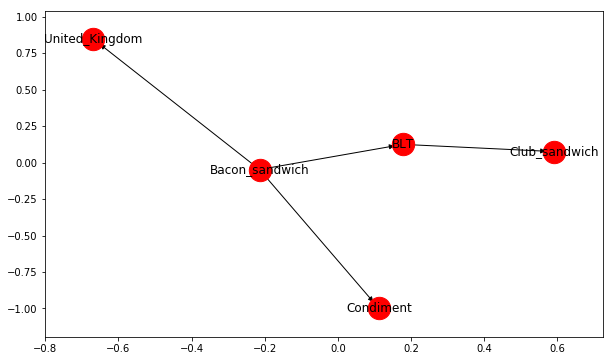

In [91]:
entry = train.sample(idx='25_100')
entry.draw_graph()

In [92]:
sorted(entry.graph.degree, key=lambda x: x[1], reverse=True)

[('Bacon_sandwich', 3),
 ('BLT', 2),
 ('Club_sandwich', 1),
 ('Condiment', 1),
 ('United_Kingdom', 1)]

# Typos

"Afonso Pena International Airport ICAO Location **Idenitifier** is SBCT."

rather than

"Afonso Pena International Airport ICAO Location **Identifier** is SBCT."

In [9]:
e = test_with_lex.sample(idx='0_3')
e

Triple info: {'category': 'Airport', 'eid': 'Id4', 'idx': '0_3', 'ntriples': 1}

	Modified triples:

Afonso_Pena_International_Airport | ICAO_Location_Identifier | "SBCT"


	Lexicalizations:

Afonso Pena International Airport ICAO Location Idenitifier is SBCT.
SBCT is the ICAO location identifier of Afonso Pena International Airport.

In [16]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

lex = WebNLGCorpus.load("test_with_lex")

s_multiwordexpressions = lex.mdf.m_subject.str.lower().str.replace('_', ' ').str.split().tolist()
o_multiwordexpressions = lex.mdf.m_object.str.lower().str.replace('_', ' ').str.split().tolist()

all_multiwordexpressions = s_multiwordexpressions + o_multiwordexpressions
all_multiwordexpressions = list(set([tuple(s) for s in all_multiwordexpressions]))

from nltk.tokenize.mwe import MWETokenizer

t = MWETokenizer(all_multiwordexpressions)

from textacy.preprocess import preprocess_text

def preprocess(ref):
    
    ref = preprocess_text(ref, no_accents=True, lowercase=True, no_punct=True)
    
    return t.tokenize(ref.split())

cc = SmoothingFunction()
def bleu(e, text):
    
    references = [preprocess(ref) for ref in e.ldf.ltext.tolist()]

    # TODO: same smoothing as Moses?
    return sentence_bleu(references, preprocess(text), smoothing_function=cc.method3)

In [17]:
bleu(e, 'Afonso Pena International Airport ICAO Location Identifier is SBCT.')

0.5081327481546147

In [18]:
bleu(e, 'Afonso Pena International Airport ICAO Location Idenitifier is SBCT.')

1.0